In [32]:
from sklearn import svm
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("MAD_III")

In [38]:
data = pd.read_csv("data/nonsep.csv",header=None,sep=';')
data.shape

(140, 3)

In [62]:
def generate_colors(indices):
    colors = []
    for cId in indices:
        if cId == 1:
            colors.append("red")
        else:
            colors.append("blue")
    return colors

In [63]:
X = list(data[0])
Y = list(data[1])
svmInput = [ [data[0][row], data[1][row]] for row in range(len(data))]
GT = list(data[2])
colors = generate_colors(GT)

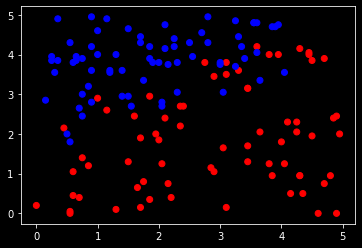

In [64]:
plt.scatter(X,Y,c=colors)

In [56]:
clf = svm.SVC(gamma='scale')
clf.fit(svmInput, GT)
# clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

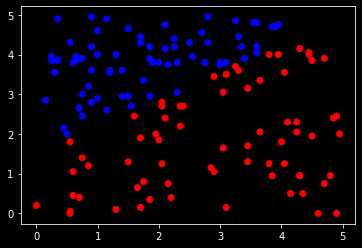

In [66]:
predicted = clf.predict(svmInput)
plt.scatter(X,Y,c=generate_colors(predicted))

In [89]:
k = 4
kFold = KFold(n_splits=k,shuffle=False)
dataset = kFold.split(data)

benchmark = []
splitDataset = []

for trainIndices,testIndices in kFold.split(data):
    splitDataset.append({
        "train": [[data[0][rowIndex], data[1][rowIndex]] for rowIndex in trainIndices],
        "test": [[data[0][rowIndex], data[1][rowIndex]] for rowIndex in testIndices],
        "trainGT": [data[2][rowIndex] for rowIndex in trainIndices],
        "testGT": [data[2][rowIndex] for rowIndex in testIndices]
    })

for kf in range(k):
    kFoldResult = {"Index": kf, "KernelInfo": []}
    for _kernel in ['linear','rbf','sigmoid']:
        kernelResult = {"Kernel": _kernel, "precision": []}

        svmPredictor = svm.SVC(kernel=_kernel,gamma='scale',C=100.0)
        svmPredictor.fit(splitDataset[kf]["train"], splitDataset[kf]["trainGT"])
        predictedLabels = svmPredictor.predict(splitDataset[kf]["test"])
        correct = sum([ splitDataset[kf]["testGT"][x] == predictedLabels[x] for x in range(len(testData))])
        precision = float(correct) / len(testGT)
        kernelResult["precision"].append(precision)
        
        kFoldResult["KernelInfo"].append(kernelResult)

    benchmark.append(kFoldResult)
benchmark

# for _kernel in ['linear','rbf','sigmoid']:
#     kernelResult = {"kernel": _kernel, "precision": []}
    
#     for trainIndices,testIndices in kFold.split(data):
#         trainData = [ [data[0][rowIndex], data[1][rowIndex]] for rowIndex in trainIndices ]
#         testData = [ [data[0][rowIndex], data[1][rowIndex]] for rowIndex in testIndices ]
#         trainGT = [ data[2][rowIndex] for rowIndex in trainIndices ]
#         testGT = [ data[2][rowIndex] for rowIndex in testIndices ]

#         svmPredictor = svm.SVC(kernel=_kernel,gamma='scale',C=100.0)
#         svmPredictor.fit(trainData, trainGT)
#         predictedLabels = svmPredictor.predict(testData)
#         correct = sum([ testGT[x] == predictedLabels[x] for x in range(len(testData))])
#         precision = float(correct) / len(testGT)
#         # print(f"Prediction precision: {precision}")
#         kernelResult["precision"].append(precision)
#     benchmark.append(kernelResult)
# benchmar

[{'Index': 0,
  'KernelInfo': [{'Kernel': 'linear', 'precision': [1.0]},
   {'Kernel': 'rbf', 'precision': [0.8857142857142857]},
   {'Kernel': 'sigmoid', 'precision': [0.9714285714285714]}]},
 {'Index': 1,
  'KernelInfo': [{'Kernel': 'linear', 'precision': [1.0]},
   {'Kernel': 'rbf', 'precision': [0.9428571428571428]},
   {'Kernel': 'sigmoid', 'precision': [0.8857142857142857]}]},
 {'Index': 2,
  'KernelInfo': [{'Kernel': 'linear', 'precision': [0.9142857142857143]},
   {'Kernel': 'rbf', 'precision': [0.9142857142857143]},
   {'Kernel': 'sigmoid', 'precision': [0.8285714285714286]}]},
 {'Index': 3,
  'KernelInfo': [{'Kernel': 'linear', 'precision': [0.42857142857142855]},
   {'Kernel': 'rbf', 'precision': [0.5142857142857142]},
   {'Kernel': 'sigmoid', 'precision': [0.5714285714285714]}]}]